In [32]:
# Imports
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

from sqlalchemy.ext.declarative import declarative_base

In [2]:
# Connection stuff
engine = create_engine("sqlite:///meteorites.sqlite")
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

In [4]:
# Create an inspector object
inspector = inspect(engine)

# Get column information for a specific table (e.g., 'users')
table_name = 'meteorites'

In [5]:
# Query the database to get all rows and columns
query = f"SELECT * FROM {table_name}"

# Use Pandas to directly read from the SQL query and create a DataFrame
df = pd.read_sql(query, engine)

df

,id,rec_class,mass,year,rec_lat,rec_long
0,9375,L6,68.80,1990,-76.269620,156.440560
1,1587,L6,142.70,1977,-76.716670,159.666670
2,29422,H4,6.91,1983,-71.500000,35.666670
3,11895,Stone-uncl,1415.00,1923,9.066670,38.416670
4,49586,L5,325.20,2006,-85.766667,179.383333
...,...,...,...,...,...,...
100495,51286,L6,5.70,2007,-83.250000,157.000000
100496,45047,L6,30.50,2004,-86.366670,-70.000000
100497,28003,H4/5,1.89,1979,-71.500000,35.666670
100498,19986,L4,9.50,1994,-84.000000,168.000000


In [6]:
query = f"""SELECT year, COUNT(*) AS num_meteorites
FROM meteorites
WHERE year > 1900
GROUP BY year
ORDER BY year;
"""
year_df = pd.read_sql(query, engine)
year_df

,year,num_meteorites
0,1901,20
1,1902,31
2,1903,48
3,1904,28
4,1905,29
...,...,...
108,2009,3399
109,2010,2319
110,2011,1616
111,2012,549


In [28]:
query = f"""SELECT rec_class, COUNT(*) AS num_meteorites
FROM meteorites
GROUP BY rec_class
HAVING COUNT(*) > 100;
"""
rec_class_df = pd.read_sql(query, engine)
rec_class_df

,rec_class,num_meteorites
0,Acapulcoite,127
1,Achondrite-ung,130
2,Aubrite,141
3,CK4,169
4,CK5,210
...,...,...
60,L~6,214
61,Martian (shergottite),207
62,Mesosiderite,294
63,OC,159


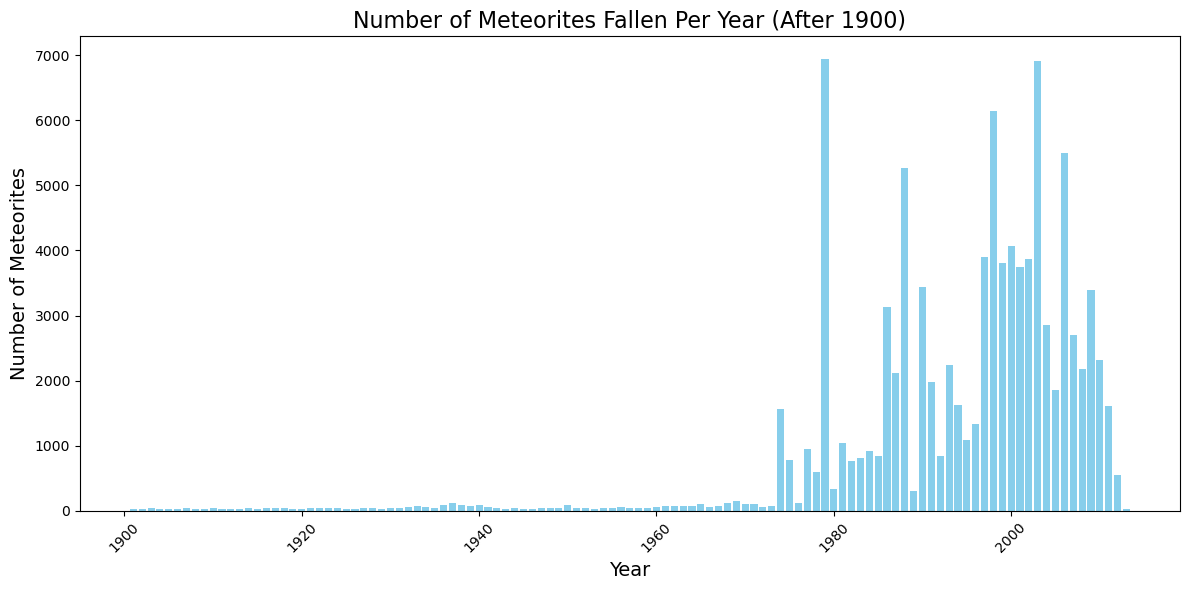

In [9]:
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
plt.bar(year_df['year'], year_df['num_meteorites'], color='skyblue')

# Adding titles and labels
plt.title('Number of Meteorites Fallen Per Year (After 1900)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Meteorites', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels better
plt.show()

In [10]:
query = f"""SELECT year, COUNT(*) AS num_meteorites
FROM meteorites
WHERE year > 1960
GROUP BY year
ORDER BY year;
"""
year_df2 = pd.read_sql(query, engine)
year_df2

,year,num_meteorites
0,1961,65
1,1962,78
2,1963,77
3,1964,76
4,1965,101
5,1966,56
6,1967,76
7,1968,122
8,1969,150
9,1970,103


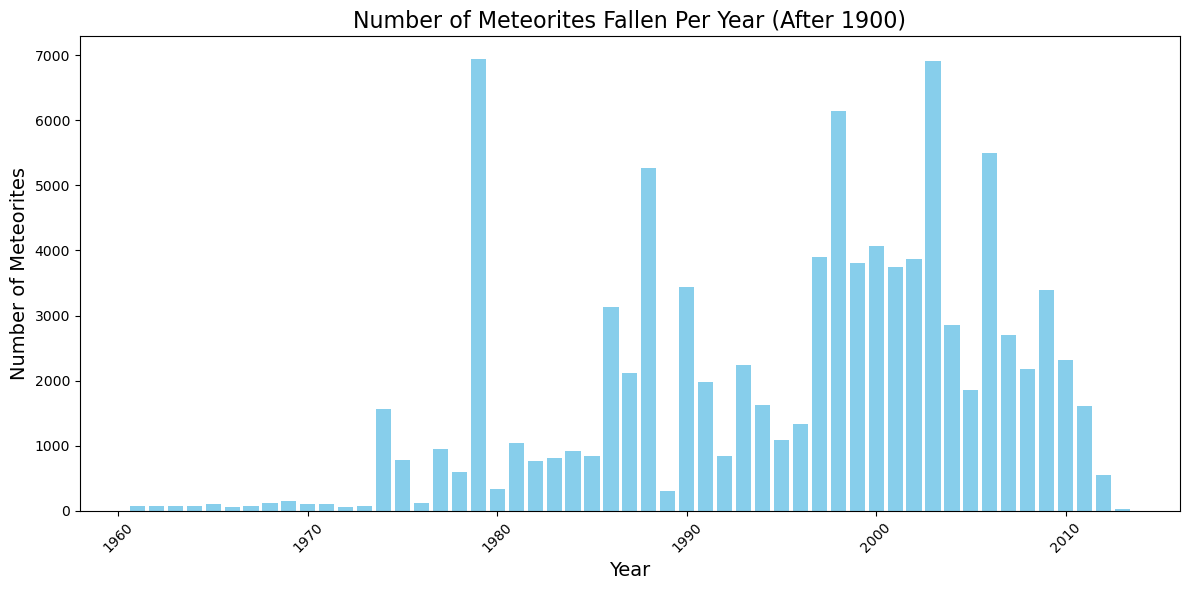

In [17]:
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
plt.bar(year_df2['year'], year_df2['num_meteorites'], color='skyblue')

# Adding titles and labels
plt.title('Number of Meteorites Fallen Per Year (After 1900)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Meteorites', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels better
plt.show()

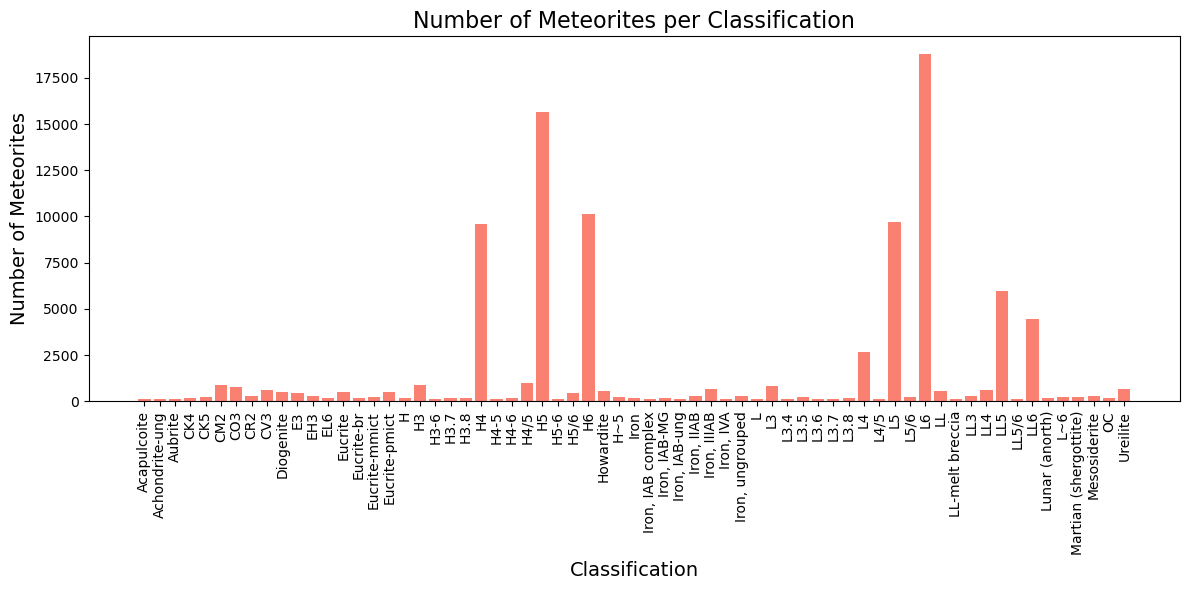

In [29]:
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
plt.bar(rec_class_df['rec_class'], rec_class_df['num_meteorites'], color='salmon')

# Adding titles and labels
plt.title('Number of Meteorites per Classification', fontsize=16)
plt.xlabel('Classification', fontsize=14)
plt.ylabel('Number of Meteorites', fontsize=14)

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=90)  # Rotate by 90 degrees if the names are long

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels better
plt.show()

In [ ]:
# Class data too much for pie chart unless we cut it down
# Not many meteor falls in earlier years
# Not many classes with over 400 meteor falls

In [37]:
query = f"""
SELECT rec_class, year, COUNT(*) AS num_meteorites
FROM meteorites
GROUP BY rec_class, year
HAVING COUNT(*) > 100
ORDER BY year;
"""
rec_class_df2 = pd.read_sql(query, engine)
rec_class_df2


,rec_class,year,num_meteorites
0,H4,1974,121
1,H5,1974,550
2,H6,1974,494
3,L6,1974,176
4,L6,1975,492
...,...,...,...
173,LL6,2010,217
174,H4,2011,181
175,H5,2011,231
176,H6,2011,120


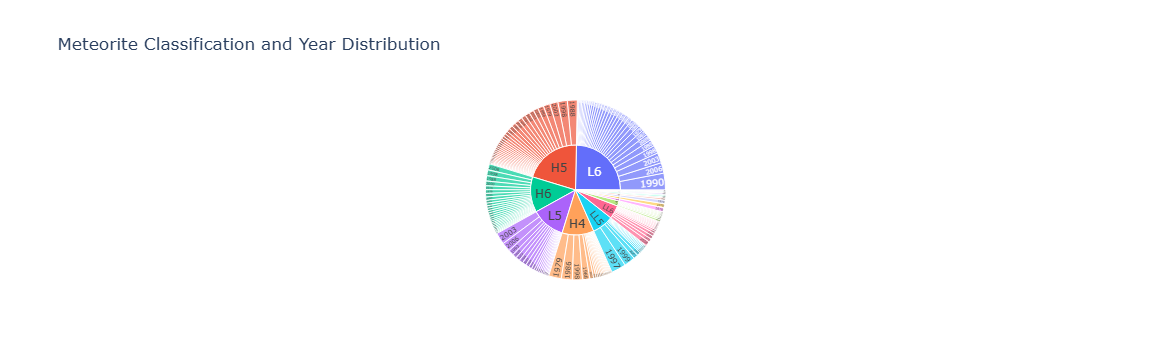

In [38]:
fig = px.sunburst(rec_class_df2, 
                  path=['rec_class', 'year'],  # Hierarchical structure (rec_class and year)
                  values='num_meteorites',  # Values represent the size of each segment
                  title='Meteorite Classification and Year Distribution')

# Show the chart
fig.show()
